In [1]:
import numpy as np
import matplotlib.pyplot as plt

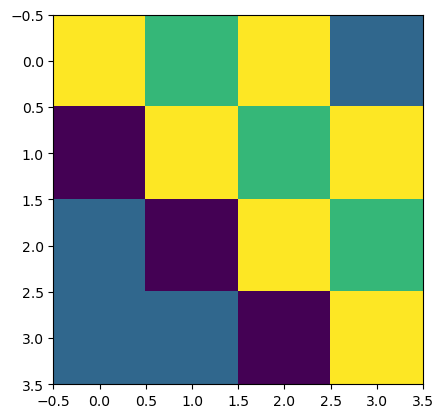

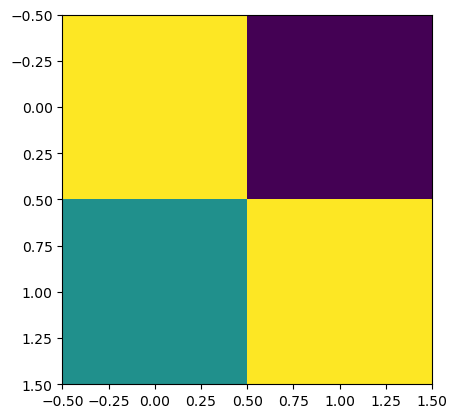

In [2]:
path = '/work/dipierrolab/douglas/final_Hi-C_maps/'
#HiC = np.loadtxt("/Users/douglas/Documents/Features Transfer/store Hi-C/PnM_haplotype_50kb.txt")
HiC = np.eye(N=4,k=1)-np.eye(N=4,k=-1)+ 2*np.eye(N=4,k=0)+2*np.eye(N=4,k=2)#practice matrix
N = HiC.shape[0]
N2 = int(N/2)
HiC_pat_mat = HiC[0:N2,N2:N]

patseq = ['A1','A1']
matseq = ['B1','A1']

plt.imshow(HiC)
plt.show()
plt.imshow(HiC_pat_mat)

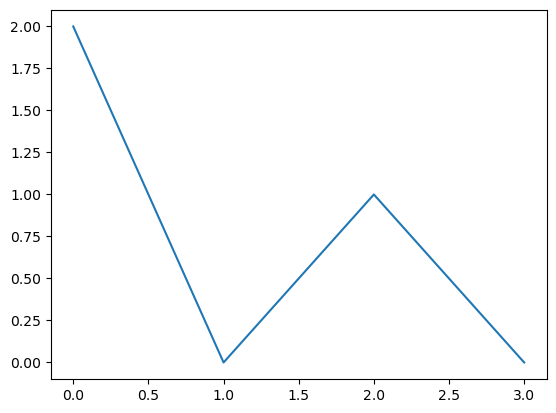

In [3]:
Ps = [] #contact probability as a function of genomic distance (Genomic distance = index in this case.)
ds = range(N)
for d in range(N):
    P_d = (np.average(np.diag(HiC,k=d))+np.average(np.diag(HiC,k=-d)))/2
    Ps.append(P_d)
plt.plot(ds,Ps)

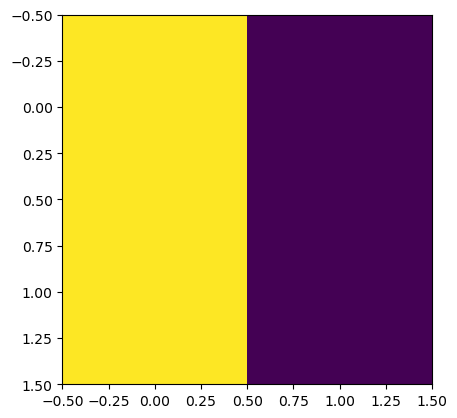

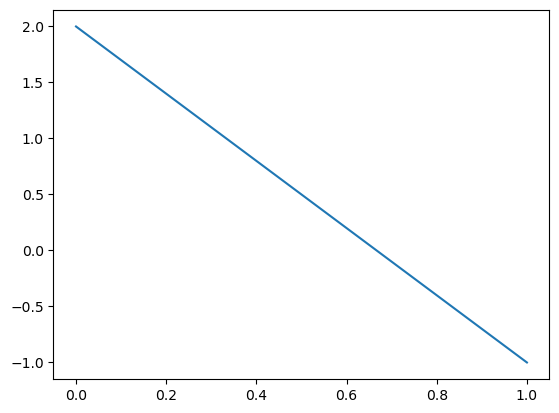

In [4]:
PsAB = np.zeros(N2)#contact probability of AB pairs of loci as a function of genomic distance (Genomic distance = index in this case.)
countersAB = np.zeros(N2)# the number of AB pairs found at genomic distance = index
ds = range(N2)
tester = np.zeros([N2,N2])
for i in range(N2):
    for j in range(N2):
        d = abs(j-i)
        if patseq[i]=='A1' and matseq[j]=='B1' or patseq[i]=='B1' and matseq[j]=='A1':
            tester[i,j] += 1
            PsAB[d] += HiC[i,j]
            countersAB[d] += 1
PsAB = PsAB/countersAB
        
plt.imshow(tester)
plt.show()
plt.plot(ds,PsAB)